In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df = pd.read_csv("KDDTrain+.csv", names = feature)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,29,7,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,3
1,0,0,13,7,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,3
2,0,2,22,6,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2
3,0,2,14,7,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,3
4,0,2,14,7,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
from scipy.stats import pearsonr

In [16]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [17]:
scores = [abs(pearsonr(features[:,i],labels)[0]) for i in range(np.shape(features)[1])]

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [18]:
scores[19] = 0
scores

[0.16646746504799223,
 0.03596063187127273,
 0.3199581510132861,
 0.40837631807557856,
 0.014465213814609749,
 0.01029818665297428,
 0.0013345572081117254,
 0.03642846715132537,
 0.0060972560344322935,
 0.093136143535697,
 0.02736683170763886,
 0.566304980922801,
 0.007911016529420957,
 0.014838097287261608,
 0.017509007796911745,
 0.008777591511100495,
 0.016590123356388663,
 0.009192399347987195,
 0.029917529284365887,
 0,
 0.00199615097881399,
 0.09751429428148603,
 0.3204712385512492,
 0.041358887719139925,
 0.26252657321488737,
 0.2592391658762218,
 0.3490566319101178,
 0.3508939574062942,
 0.4145440388308866,
 0.3403900942453238,
 0.09979427940287663,
 0.14773322953567408,
 0.5275051840355726,
 0.45386043471107274,
 0.4886385504279263,
 0.36285107877214395,
 0.31046073146991715,
 0.2614944335081804,
 0.2639997918241256,
 0.32673214205963896,
 0.3521979880096663]

In [19]:
act_features = []
act_indices = []
for i in range(len(scores)):
    if(scores[i]> 0.1):
        act_indices.append(i)
        act_features.append(features[:,i])

In [20]:
act_features = np.array(act_features).T

In [21]:
for i in range(np.shape(act_features)[1]):
    if(np.std(act_features[:,i])!=0):
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))/np.std(act_features[:,i]) 
    else:
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))
np.shape(act_features)

(125973, 21)

In [22]:
np.shape(features),np.shape(labels)

((125973, 41), (125973,))

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
train_X, test_X , train_Y ,test_Y = train_test_split(act_features,labels,random_state = 42,test_size = 0.1)

In [25]:
print(np.shape(train_X),np.shape(test_X),np.shape(train_Y),np.shape(test_Y))

(113375, 21) (12598, 21) (113375,) (12598,)


# Stacked Convolutional Auto Encoder

### First Stack

In [26]:
from keras.layers import *
from keras.models import Model

In [27]:
batch_size = 64
input_dim = (np.shape(train_X)[1],1)
input_layer = Input(shape=input_dim, name='input')
#Input Layer
encoder1 = Conv1D (64,3)(input_layer)
encoder1 = MaxPooling1D(2)(encoder1)
#Encoder’s first dense layer
encoder2 = Conv1D (32,3)(encoder1)
encoder2 = MaxPooling1D(2)(encoder2)
# Code layer
latent_layer = Dense (32, name = 'latent_1')(encoder2)
# Decoder’s first dense layer
decoder1 = Conv1DTranspose (32,3)(latent_layer)
decoder1 = UpSampling1D(2)(decoder1)
# Decoder’s Third dense layer
decoder2 = Conv1DTranspose (64,3)(decoder1)
decoder2 = UpSampling1D(2)(decoder2)
flatten = Flatten()(decoder2)
# Output Layer
output_layer = Dense(input_dim[0])(flatten)
output_layer = Reshape((input_dim[0],1), input_shape=(input_dim[0],))(output_layer)

In [28]:
autoencoder_1 = Model(inputs=input_layer, outputs=output_layer)
autoencoder_1.compile(metrics=tf.keras.metrics.RootMeanSquaredError(),loss='mse',optimizer='adam')

In [29]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 21, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 19, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 latent_1 (Dense)            (None, 3, 32)             1056  

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [32]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
1772/1772 [==============================] - 8s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0750
Epoch 2/100
1772/1772 [==============================] - 8s 4ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 3/100
1772/1772 [==============================] - 8s 4ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 4/100
1772/1772 [==============================] - 8s 4ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 5/100
1772/1772 [==============================] - 7s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 6/100
1772/1772 [==============================] - 7s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_l

In [33]:
pred = autoencoder_1.predict(act_features)

3937/3937 [==============================] - 7s 2ms/step


In [34]:
from sklearn.metrics import *
import keras

In [35]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(act_features)

3937/3937 [==============================] - 5s 1ms/step


### Classifier Model

In [36]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1:]
input_layer = Input(shape=(input_dim), name='input')
flatten = Flatten()(input_layer)
#Input Layer
dense1 = Dense (128, activation='relu')(flatten)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [37]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [38]:
classify.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3, 32)]           0         
                                                                 
 flatten_1 (Flatten)         (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               12416     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 21,237
Trainable params: 21,237
Non-trainable

In [39]:
train_X, test_X , train_Y ,test_Y = train_test_split(intermediate_output_1,labels,random_state = 42,test_size = 0.1)

In [40]:
history = classify.fit(train_X, train_Y, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_X, test_Y))

Epoch 1/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0849 - accuracy: 0.9740 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 2/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0458 - accuracy: 0.9839 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 3/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0391 - accuracy: 0.9862 - val_loss: 0.0466 - val_accuracy: 0.9835
Epoch 4/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0351 - accuracy: 0.9877 - val_loss: 0.0445 - val_accuracy: 0.9856
Epoch 5/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0326 - accuracy: 0.9883 - val_loss: 0.0377 - val_accuracy: 0.9867
Epoch 6/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0308 - accuracy: 0.9891 - val_loss: 0.0425 - val_accuracy: 0.9864
Epoch 7/100
3543/3543 [==============================] - 7s 2ms/step - loss: 0.0293 - accuracy: 0.9893 - val_loss: 0.0363 - val_ac

In [41]:
preds = classify.predict(test_X)

394/394 [==============================] - 0s 830us/step


In [42]:
np.shape(preds),np.shape(test_Y)

((12598, 5), (12598,))

In [43]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [44]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), test_Y)

In [45]:
print(accuracy_score(np.argmax(preds,axis = 1),test_Y))
print(precision_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))

0.9908715669153834
0.7566941611554874
0.7767748298616735
0.7661061928385025


C:\Users\ArrunPersonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
import seaborn as sns

<AxesSubplot:>

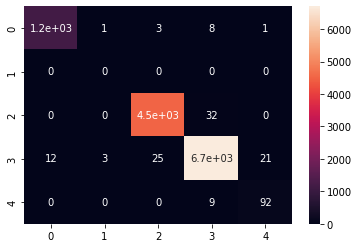

In [47]:
sns.heatmap(conf_mat, annot=True)